In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data_bitcoin = pd.read_csv('/content/drive/MyDrive/bitcoin.csv')
data_bitcoin = pd.read_csv('bitcoin.csv')

In [4]:
data_bitcoin.columns

Index(['Date', 'Price'], dtype='object')

In [5]:
data_bitcoin.dtypes

Date      object
Price    float64
dtype: object

In [6]:
data_bitcoin['Date'] = pd.to_datetime(data_bitcoin['Date'])
data_bitcoin.sort_values(by='Date', inplace=True)

In [7]:
data_bitcoin

,Date,Price
0,2019-05-23,7881.846680
1,2019-05-24,7987.371582
2,2019-05-25,8052.543945
3,2019-05-26,8673.215820
4,2019-05-27,8805.778320
...,...,...
362,2020-05-19,9729.038086
363,2020-05-20,9522.981445
364,2020-05-21,9081.761719
365,2020-05-22,9182.577148


In [8]:
data_bitcoin.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [9]:
data_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    367 non-null    datetime64[ns]
 1   Price   367 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [10]:
data_bitcoin.describe()

,Date,Price
count,367,367.000000
mean,2019-11-22 00:00:00,8810.429461
min,2019-05-23 00:00:00,4970.788086
25%,2019-08-22 12:00:00,7661.308594
50%,2019-11-22 00:00:00,8757.788086
75%,2020-02-21 12:00:00,9867.711426
max,2020-05-23 00:00:00,13016.231450
std,NaN,1486.188684


In [11]:
price_column = data_bitcoin['Price']

# Calculate summary statistics
mean_price = price_column.mean()
std_deviation = price_column.std()
q1 = price_column.quantile(0.25)
q3 = price_column.quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = price_column[(price_column < lower_bound) | (price_column > upper_bound)]


/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


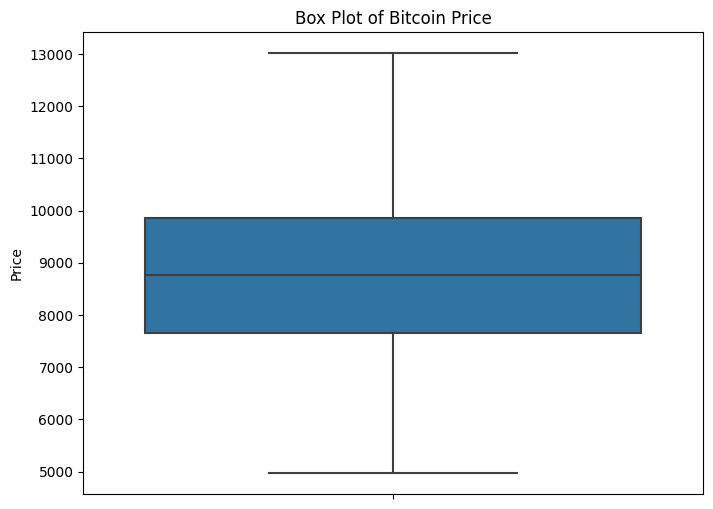

In [12]:
# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=price_column)
plt.ylabel('Price')
plt.title('Box Plot of Bitcoin Price')
plt.show()

# Train-Test Split:

In [13]:
from sklearn.model_selection import train_test_split

train_size = 0.8
train_data = data_bitcoin[:int(train_size * len(data_bitcoin))]
test_data = data_bitcoin[int(train_size * len(data_bitcoin)):]


# Data Normalization:

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data.loc[:, 'Price'] = scaler.fit_transform(train_data['Price'].values.reshape(-1, 1))
test_data.loc[:, 'Price'] = scaler.transform(test_data['Price'].values.reshape(-1, 1))


# Sequence Data Preparation:
* Create sequences of data for the LSTM model.


In [15]:
import numpy as np

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10  # Adjust the sequence length as needed
X_train = create_sequences(train_data['Price'], sequence_length)
X_test = create_sequences(test_data['Price'], sequence_length)


# Build the LSTM Model:

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')



2023-09-30 19:44:04.433542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 19:44:05.372813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2023-09-30 19:44:07.860966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-30 19:44:07.911483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-30 19:44:07.911703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Train the model

In [20]:
model.fit(X_train, train_data['Price'][sequence_length:], epochs=200, batch_size=32)

Epoch 1/200


2023-09-30 19:43:39.160270: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-09-30 19:43:39.161276: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-09-30 19:43:39.179840: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-09-30 19:43:39.180753: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-09-30 19:43:39.199778: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-09-30 19:43:39.200749: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:5

InternalError: Graph execution error:

Detected at node 'Adam/StatefulPartitionedCall_4' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_100261/3482865817.py", line 1, in <module>
      model.fit(X_train, train_data['Price'][sequence_length:], epochs=200, batch_size=32)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1230, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1260, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1352, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/evaface/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1347, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'Adam/StatefulPartitionedCall_4'
libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_4057]

# Evaluate the Model:

In [ ]:
# Reshape the test data
X_test = X_test.reshape(-1, sequence_length, 1)

# Predict Bitcoin prices
predicted_prices = model.predict(X_test)

# Inverse transform to get the actual price values
predicted_prices = scaler.inverse_transform(predicted_prices)


2/2 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform to get the actual price values
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform the test data to get the actual prices
actual_prices = scaler.inverse_transform(test_data['Price'][sequence_length:].values.reshape(-1, 1))

# Calculate MAE
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")


2/2 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 242.82640081689453


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 106382.54893201133


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform to get the actual price values
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform the test data to get the actual prices
actual_prices = scaler.inverse_transform(test_data['Price'][sequence_length:].values.reshape(-1, 1))

# Calculate MAE
mae = mean_absolute_error(actual_prices, predicted_prices)

# Calculate MSE
mse = mean_squared_error(actual_prices, predicted_prices)

# Calculate RMSE (if needed)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


2/2 [==============================] - 0s 6ms/step
Mean Absolute Error (MAE): 242.83
Mean Squared Error (MSE): 106382.55
Root Mean Squared Error (RMSE): 326.16
R-squared (R2): 0.93


In [ ]:
from datetime import datetime

# Input date from the user
user_input_date = input("Enter the date (YYYY-MM-DD): ")

# Convert user input to datetime
try:
    user_date = datetime.strptime(user_input_date, '%Y-%m-%d')
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD format.")
    exit()

# Search for the closest date in the dataset
date_diff = (data_bitcoin['Date'] - user_date).abs()
closest_date_index = date_diff.idxmin()
closest_date = data_bitcoin.loc[closest_date_index, 'Date']

# Check if the date difference is within an acceptable range
max_date_diff = pd.Timedelta(days=1)  # Adjust this as needed
if date_diff[closest_date_index] > max_date_diff:
    print("No matching date found in the dataset.")
else:
    # Extract the sequence of historical prices
    user_input_sequence = data_bitcoin['Price'].values[closest_date_index - sequence_length:closest_date_index]

    # Check if there are enough historical prices for the sequence
    if len(user_input_sequence) < sequence_length:
        print("Not enough historical data for prediction.")
    else:
        # Normalize the input sequence
        user_input_sequence_normalized = scaler.transform(user_input_sequence.reshape(-1, 1))

        # Reshape for LSTM input
        user_input_sequence_normalized = user_input_sequence_normalized.reshape(1, sequence_length, 1)

        # Predict the Bitcoin price
        predicted_price_normalized = model.predict(user_input_sequence_normalized)

        # Inverse transform to get the actual price value
        predicted_price = scaler.inverse_transform(predicted_price_normalized)

        # Display the prediction
        print(f"Predicted Bitcoin Price for {closest_date.strftime('%Y-%m-%d')}: {predicted_price[0][0]:.2f}")


Enter the date (YYYY-MM-DD): 2020-02-14
1/1 [==============================] - 0s 247ms/step
Predicted Bitcoin Price for 2020-02-14: 276.62


In [ ]:
data_bitcoin.sample()

,Date,Price
267,2020-02-14,0.575873
